## Observations and Insights 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = 'outer')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["duplicated"] = combined_df.duplicated(keep='first', subset=["Mouse ID", "Timepoint"])

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicated_rows = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep='first')
drop_duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = drop_duplicated_rows["Mouse ID"].nunique()
mouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Naftisol_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Naftisol"].mean()
Ramican_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ramicane"].mean()
Capomulin_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Capomulin"].mean()
Ceftamin_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ceftamin"].mean()
Infubinol_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Infubinol"].mean()
Ketapril_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ketapril"].mean()
Placebo_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Placebo"].mean()
Propriva_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Propriva"].mean()
Stelasyn_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Stelasyn"].mean()
Zoniferol_mean = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Zoniferol"].mean()
Naftisol_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Naftisol"].median()
Ramican_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ramicane"].median()
Capomulin_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Capomulin"].median()
Ceftamin_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ceftamin"].median()
Infubinol_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Infubinol"].median()
Ketapril_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ketapril"].median()
Placebo_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Placebo"].median()
Propriva_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Propriva"].median()
Stelasyn_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Stelasyn"].median()
Zoniferol_median = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Zoniferol"].median()
Naftisol_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Naftisol"].var()
Ramican_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ramicane"].var()
Capomulin_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Capomulin"].var()
Ceftamin_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ceftamin"].var()
Infubinol_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Infubinol"].var()
Ketapril_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ketapril"].var()
Placebo_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Placebo"].var()
Propriva_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Propriva"].var()
Stelasyn_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Stelasyn"].var()
Zoniferol_var = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Zoniferol"].var()
Naftisol_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Naftisol"].std()
Ramican_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ramicane"].std()
Capomulin_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Capomulin"].std()
Ceftamin_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ceftamin"].std()
Infubinol_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Infubinol"].std()
Ketapril_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ketapril"].std()
Placebo_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Placebo"].std()
Propriva_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Propriva"].std()
Stelasyn_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Stelasyn"].std()
Zoniferol_std = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Zoniferol"].std()
Naftisol_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Naftisol"].sem()
Ramican_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ramicane"].sem()
Capomulin_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Capomulin"].sem()
Ceftamin_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ceftamin"].sem()
Infubinol_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Infubinol"].sem()
Ketapril_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Ketapril"].sem()
Placebo_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Placebo"].sem()
Propriva_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Propriva"].sem()
Stelasyn_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Stelasyn"].sem()
Zoniferol_sem = drop_duplicated_rows["Tumor Volume (mm3)"].loc[drop_duplicated_rows["Drug Regimen"] == "Zoniferol"].sem()

summary_df = pd.DataFrame({"Mean": [Capomulin_mean, Ceftamin_mean, Infubinol_mean, Ketapril_mean, Naftisol_mean, Placebo_mean, Propriva_mean, Ramican_mean, Stelasyn_mean, Zoniferol_mean],
                                    "Median" : [Capomulin_median, Ceftamin_median, Infubinol_median, Ketapril_median, Naftisol_median, Placebo_median, Propriva_median, Ramican_median, Stelasyn_median, Zoniferol_median],
                                    "Variance": [Capomulin_var, Ceftamin_var, Infubinol_var, Ketapril_var, Naftisol_var, Placebo_var, Propriva_var, Ramican_var, Stelasyn_var, Zoniferol_var],
                                    "Standard Deviation": [Capomulin_std, Ceftamin_std, Infubinol_std, Ketapril_std, Naftisol_std, Placebo_std, Propriva_std, Ramican_std, Stelasyn_std, Zoniferol_std],
                                    "SEM": [Capomulin_sem, Ceftamin_sem, Infubinol_sem, Ketapril_sem, Naftisol_sem, Placebo_sem, Propriva_sem, Ramican_sem, Stelasyn_sem, Zoniferol_sem]},
                         index = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]) 
summary_df["Mean"] = summary_df["Mean"].map('{:,.2f}'.format)
summary_df["Median"] = summary_df["Median"].map('{:,.2f}'.format)
summary_df["Variance"] = summary_df["Variance"].map('{:,.2f}'.format)
summary_df["Standard Deviation"] = summary_df["Standard Deviation"].map('{:,.2f}'.format)
summary_df["SEM"] = summary_df["SEM"].map('{:,.2f}'.format)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

groupby_summary_df = drop_duplicated_rows.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': 'mean'})
groupby_summary_df = groupby_summary_df.rename(columns = {"Tumor Volume (mm3)" : "Mean"})
groupby_summary_df["Median"] =  drop_duplicated_rows.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': 'median'})
groupby_summary_df["Variance"] = drop_duplicated_rows.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': 'var'})
groupby_summary_df["Standard Deviation"] = drop_duplicated_rows.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': 'std'})
groupby_summary_df["SEM"] = drop_duplicated_rows.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': 'sem'})
groupby_summary_df["Mean"] = groupby_summary_df["Mean"].map('{:,.2f}'.format)
groupby_summary_df["Median"] = groupby_summary_df["Median"].map('{:,.2f}'.format)
groupby_summary_df["Variance"] = groupby_summary_df["Variance"].map('{:,.2f}'.format)
groupby_summary_df["Standard Deviation"] = groupby_summary_df["Standard Deviation"].map('{:,.2f}'.format)
groupby_summary_df["SEM"] = groupby_summary_df["SEM"].map('{:,.2f}'.format)
groupby_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Mouse Count'>

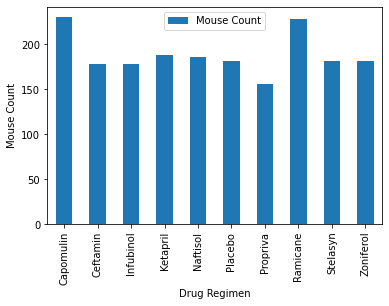

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
groupby_summary_df["Mouse Count"] = drop_duplicated_rows.groupby(["Drug Regimen"]).agg({'Mouse ID': 'count'})
bar_plot_pandas = groupby_summary_df.plot.bar(y="Mouse Count",ylabel="Mouse Count", alpha=1)
bar_plot_pandas

<BarContainer object of 10 artists>

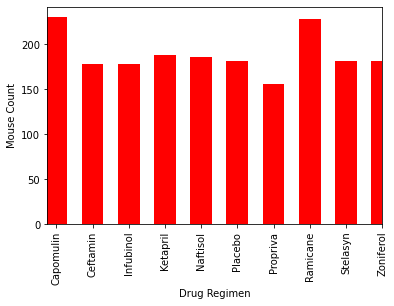

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = groupby_summary_df["Mouse Count"]
y_axis = groupby_summary_df.index
bar_plot_pyplot = plt.bar(y_axis, x_axis, color='r', alpha=1, align="center", width=0.6)
plt.ylabel("Mouse Count")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.xlim(-.25, len(x_axis)-1)
#plt.title("Mouse count per Drug Regimen")
bar_plot_pyplot

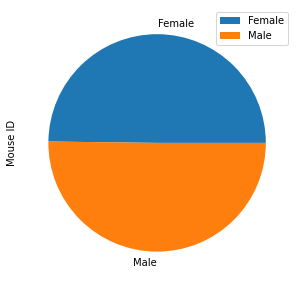

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = drop_duplicated_rows.groupby(["Sex"]).agg({'Mouse ID': 'nunique'})

plot = gender_df.plot.pie(y="Mouse ID", figsize=(5,5),)

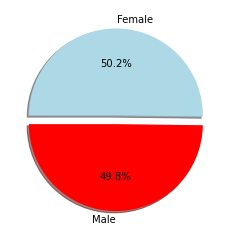

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
explode = (0.1, 0,)
colors = ["red", "lightblue"]
plot = plt.pie(gender_df["Mouse ID"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
subset_duplicated_rows = drop_duplicated_rows[drop_duplicated_rows["Drug Regimen"].isin(["Infubinol","Ramicane", "Capomulin", "Ceftamin"])] 
subset_duplicated_rows = subset_duplicated_rows.drop(columns=["Sex", "Age_months", "Weight (g)", "Metastatic Sites", "duplicated"])
subset_duplicated_rows = subset_duplicated_rows.drop_duplicates(subset=["Mouse ID"], keep='last')

# Start by getting the last (greatest) timepoint for each mouse
subset_duplicated_rows = subset_duplicated_rows.drop_duplicates(subset=["Mouse ID"], keep='last')
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
subset_duplicated_rows

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
subset_duplicated_rows = subset_duplicated_rows.rename(columns={"Drug Regimen":"Drug_regimen", "Tumor Volume (mm3)": "Tumor_volume"})
Capomulin_list = subset_duplicated_rows["Tumor_volume"].loc[subset_duplicated_rows["Drug_regimen"] == "Capomulin"].to_list()
Ramicane_list = subset_duplicated_rows["Tumor_volume"].loc[subset_duplicated_rows["Drug_regimen"] == "Ramicane"].to_list()
Infubinol_list = subset_duplicated_rows["Tumor_volume"].loc[subset_duplicated_rows["Drug_regimen"] == "Infubinol"].to_list()
Ceftamin_list = subset_duplicated_rows["Tumor_volume"].loc[subset_duplicated_rows["Drug_regimen"] == "Ceftamin"].to_list()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#lower_bound.map('{:,.2f}'.format)
#upper_bound.map('{:,.2f}'.format)
print('{:.2f}'.format(lower_bound))
print('{:.2f}'.format(upper_bound))
# Locate the rows which contain mice on each drug and get the tumor volumes
for rows in Capomulin_list,Ramicane_list,Infubinol_list,Ceftamin_list:
    Capomulin_outliers = []
    Ramicane_outliers = []
    Infubinol_outliers = []
    Ceftamin_outliers = []
     # Determine outliers using upper and lower bounds
    if Capomulin_list[0] > upper_bound:
       Capomulin_outliers.append()
    elif Capomulin_list[0] < lower_bound: 
       Capomulin_outliers.append()
    else: 
      next
    if Ramicane_list[0] > upper_bound:
       Ramicane_outliers.append()
    elif Ramicane_list[0] < lower_bound: 
       Ramicane_outliers.append()
    else: 
      next
    if Infubinol_list[0] > upper_bound:
       Infubinol_outliers.append()
    elif Infubinol_list[0] < lower_bound: 
       Infubinol_outliers.append()
    else: 
      next
    if Ceftamin_list[0] > upper_bound:
       Ceftamin_outliers.append()
    elif Ceftamin_list[0] < lower_bound: 
       Ceftamin_outliers.append()
    else: 
      next
print(Capomulin_outliers)
print(Ramicane_outliers)
print(Infubinol_outliers)
print(Ceftamin_outliers)

   


3.07
94.04
[]
[]
[]
[]


<AxesSubplot:title={'center':'Tumor v Treatment'}, ylabel='Tumor Size'>

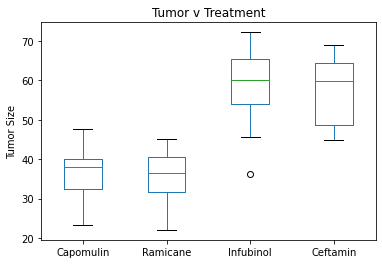

In [106]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_list = pd.DataFrame({'Capomulin' : Capomulin_list,
                            'Ramicane' : Ramicane_list,
                            'Infubinol': Infubinol_list,
                            'Ceftamin': Ceftamin_list}, 
                            columns=['Capomulin','Ramicane', 'Infubinol','Ceftamin'])
Tumor_box = Tumor_list.plot.box(xlabel = "Treatment type", ylabel = "Tumor Size", title = "Tumor v Treatment")
Tumor_box 

## Line and Scatter Plots

           Tumor Volume (mm3)
Timepoint                    
0                 1125.000000
5                 1106.652160
10                1077.107265
15                1009.543616
20                 936.475482
25                 878.669612
30                 852.925464
35                 831.970455
40                 776.118017
45                 760.958390


Text(0.5, 1.0, 'Tumor size over time')

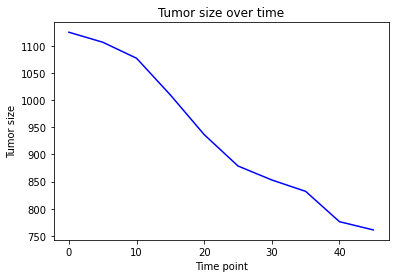

In [181]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_drug_regimen = drop_duplicated_rows.loc[drop_duplicated_rows["Drug Regimen"] == "Capomulin", ["Timepoint","Tumor Volume (mm3)"]]
Capomulin_tumor_size =  Capomulin_drug_regimen.groupby(["Timepoint"]).sum()
x = Capomulin_tumor_size.index
y = Capomulin_tumor_size["Tumor Volume (mm3)"]
plt.plot(x, y, color="blue", label="Tumor size")
plt.xlabel("Time point")
plt.ylabel("Tumor size")
plt.title("Tumor size over time")


Text(0.5, 1.0, 'Tumor Volume vs Weight')

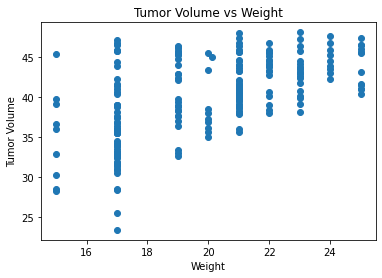

In [204]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter_plot = drop_duplicated_rows.loc[drop_duplicated_rows["Drug Regimen"] == "Capomulin", ["Weight (g)","Tumor Volume (mm3)"]]
capomulin_scatter = capomulin_scatter_plot.groupby(["Tumor Volume (mm3)"]).mean()
x = capomulin_scatter.index
y = capomulin_scatter["Weight (g)"] 
plt.scatter(y,x)
plt.ylabel("Tumor Volume")
plt.xlabel("Weight")
plt.title("Tumor Volume vs Weight")

## Correlation and Regression

Text(0.5, 1.0, 'Tumor Volume vs Weight')

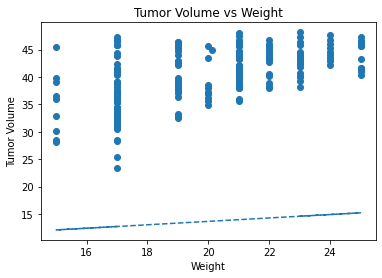

In [215]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Correlation_coefficient = capomulin_scatter.corr

st.linregress(x,y)
p_fit = p_slope * y + p_int
plt.scatter(y,x)
plt.plot(y,p_fit,"--")
plt.ylabel("Tumor Volume")
plt.xlabel("Weight")
plt.title("Tumor Volume vs Weight")